In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 
from category_encoders.target_encoder import TargetEncoder
from scipy.stats import norm, skew
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from scipy.special import boxcox
from sklearn.utils import resample
from sklearn.model_selection import (train_test_split,learning_curve,cross_val_score,
                                     KFold,TimeSeriesSplit,GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (f1_score,roc_auc_score,make_scorer,precision_score,
                             recall_score,classification_report,confusion_matrix,
                             fbeta_score,average_precision_score,precision_recall_curve)
from collections import Counter
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,
                              GradientBoostingRegressor,RandomForestRegressor,
                              AdaBoostClassifier)
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
from time import time
import lightgbm as light
import catboost as cat
import xgboost as xgb
import data_processing
import os
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline
os.getcwd()

'c:\\Users\\johnn\\玉山資料'

### Import data

In [47]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submit = pd.read_csv('./data/submission_test.csv')

### without feature engineering

'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt' 此三個變數因資料型態須預處理，故在此捨棄這四個變數，以下步驟為預先不處理資料，純塞行衡量其表現

In [33]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [35]:
# train split to train and validation training set
X_train , X_valid , y_train ,y_valid = train_test_split(
    train.drop(['cano','bacno','fraud_ind','txkey','ecfg',
                'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt'],axis=1),
    train['fraud_ind'],test_size=0.25,random_state =1102)

# competiton require measure matrix
def cus_f1(ytru, ypre):
    threshold = 0.5
    y_pre = list(map(lambda item:int(item>threshold),ypre))
    f1 = f1_score(ytru, y_pre, average='macro')
    return 'f1', f1, True

#construct model use same hyperparameters
clf = lig_model.fit(X_train,y_train
                    ,eval_set=[(X_train, y_train),(X_valid,y_valid)],
                            eval_metric=cus_f1,
                            early_stopping_rounds=100)


[1]	training's binary_logloss: 0.196619	training's f1: 0.598451	valid_1's binary_logloss: 0.199128	valid_1's f1: 0.597073
[2]	training's binary_logloss: 0.195377	training's f1: 0.598391	valid_1's binary_logloss: 0.198034	valid_1's f1: 0.596756
[3]	training's binary_logloss: 0.191719	training's f1: 0.598215	valid_1's binary_logloss: 0.194367	valid_1's f1: 0.596546
[4]	training's binary_logloss: 0.187749	training's f1: 0.59822	valid_1's binary_logloss: 0.190558	valid_1's f1: 0.596344
[5]	training's binary_logloss: 0.185229	training's f1: 0.598142	valid_1's binary_logloss: 0.188139	valid_1's f1: 0.59603
[6]	training's binary_logloss: 0.182544	training's f1: 0.598961	valid_1's binary_logloss: 0.18555	valid_1's f1: 0.596755
[7]	training's binary_logloss: 0.179712	training's f1: 0.599861	valid_1's binary_logloss: 0.182853	valid_1's f1: 0.597691
[8]	training's binary_logloss: 0.176276	training's f1: 0.601549	valid_1's binary_logloss: 0.17959	valid_1's f1: 0.599263
[9]	training's binary_loglos

In [40]:
print(f'train columns:{X_train.columns}')
print(f'train shape:{X_train.shape}')
print(f'validation shape:{X_valid.shape}')

train columns:Index(['acqic', 'conam', 'contp', 'csmcu', 'etymd', 'hcefg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'scity', 'stocn', 'stscd'],
      dtype='object')
train shape:(1141340, 14)
validation shape:(380447, 14)


### performance

fbeta score_train: 0.8973131434920859
recall_score_train: 0.9999341368635974
precision_score_train: 0.6361617431384873
fbeta score: 0.6974677920924034
recall_score: 0.7892498066511988
precision_score: 0.47603498542274053

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    375275
           1       0.48      0.79      0.59      5172

    accuracy                           0.99    380447
   macro avg       0.74      0.89      0.79    380447
weighted avg       0.99      0.99      0.99    380447



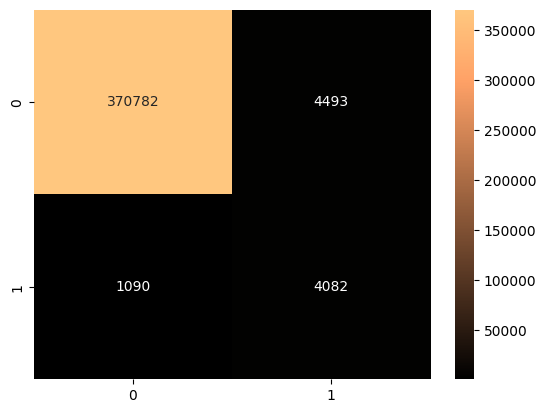

In [36]:
results = {}
results['ad'] = {}

pre_train = clf.predict(X_train)
pre_test = clf.predict(X_valid)

results['ad']['fbeta_train'] = fbeta_score(y_train, pre_train, beta=2)
results['ad']['recall_train'] = recall_score(y_train, pre_train)
results['ad']['precision_train'] = precision_score(y_train, pre_train)

results['ad']['fbeta_test'] = fbeta_score(y_valid, pre_test, beta=2)
results['ad']['recall_test'] = recall_score(y_valid, pre_test)
results['ad']['precision_test'] = precision_score(y_valid, pre_test)

print("fbeta score_train:", results['ad']['fbeta_train'])
print('recall_score_train:', results['ad']['recall_train'])
print('precision_score_train:', results['ad']['precision_train'])

print('========================================================')
print("fbeta score:", results['ad']['fbeta_test'])
print('recall_score:', results['ad']['recall_test'])
print('precision_score:', results['ad']['precision_test'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_valid, pre_test))

conf_matrix = confusion_matrix(y_valid, pre_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()


### solve the index

In [48]:
train_index = pd.DataFrame(train['txkey'])
test_index = pd.DataFrame(test['txkey'])

### concat train test into data all

In [49]:
data = pd.concat([train,test],axis=0,sort=False)

## preprocessing

In [50]:
data = data_processing.process_data(data=data)

In [51]:
data

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,median_time_cano,total_seconds_diff,total_seconds_diff_cano,date_day,week,2_week,month,is_taiwan,country_com_num,city_com_num
0,6697,12714,100972,966.58,4,62,0,2,0,0,...,48455.5,0.0,0.0,1,1,1,1,1,1676085,930790
1,5559,34695,60550,1071.10,5,62,1,8,0,0,...,27539.5,0.0,0.0,1,1,1,1,0,5680,5620
2,6750,22543,109977,438.21,5,62,0,5,0,0,...,51032.0,0.0,0.0,1,1,1,1,1,1676085,51270
3,6748,91210,207875,1174.17,5,62,0,5,0,0,...,62384.0,0.0,0.0,1,1,1,1,1,1676085,930790
4,3186,83798,179174,367.29,5,60,0,5,0,0,...,25386.5,0.0,0.0,1,1,1,1,0,56178,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943447,6173,133825,121799,199.86,2,62,0,2,0,0,...,45955.0,307638.0,307638.0,0,1,8,0,1,1676085,930790
1943448,6750,93331,189035,543.51,5,62,0,5,0,0,...,66590.5,528118.0,528118.0,0,1,8,0,1,1676085,930790
1943449,6198,54235,153139,655.51,5,62,1,2,0,0,...,73153.5,84743.0,84743.0,0,1,8,0,0,52779,48446
1943450,6198,54235,153139,490.68,5,62,1,2,0,0,...,73153.5,3.0,3.0,0,1,8,0,0,52779,48446


In [72]:
# 所使用的變數
data.columns

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey',
       'ecfg_stocn', 'ecfg_scity', 'ovrlt_stocn', 'ovrlt_scity', 'loctm_int',
       'loctm_str', 'hours', 'minutes', 'seconds', 'total_seconds', 'time',
       'trad_hour', 'morning', 'afternoon', 'night', 'midnight',
       'transaction_count', 'transaction_count_cano', 'acqic_duplicated_count',
       'conam_duplicated_count', 'conam_stocn', 'bacno_mchno', 'cano_mchno',
       'bacno_stocn', 'cano_stocn', 'bacno_scity', 'cano_scity',
       'bacno_flg_3dsmk', 'cano_flg_3dsmk', 'bacno_ecfg_mean',
       'cano_ecfg_mean', 'comsum_min', 'comsum_max', 'acc_trad_ave',
       'acc_trad_total', 'comsum_total', 'comsum_ave', 'mean_amount',
       'amtby_mean_amount', 'mean_amount_cano', 'amtby_mean_amount_cano',
       'median_amount', 'amtby_median_amount', 'med

In [77]:
# 資料大小
data.shape

(1943452, 93)

### target encoding

In [52]:
# get columns' list whose datatype as object
object_list = []
for col in data.columns.tolist():
    if data[col].dtype == 'object':
        object_list.append(col)

# select object_list whose unique value above 4 type        
nd_tar_list = []
for col in object_list:

    if len(data[col].unique()) < 5:
        nd_ont_list.append(col)
    else:
        nd_tar_list.append(col)

In [53]:
object_list

['ecfg_stocn', 'ecfg_scity', 'ovrlt_stocn', 'ovrlt_scity', 'loctm_str']

In [54]:
train = data.merge(train_index)
test = data.merge(test_index)

In [55]:
train_tar = train[train['locdt'] > 30]

tar = TargetEncoder(smoothing=0.9).fit(train_tar[nd_tar_list],train_tar['fraud_ind'])
test[nd_tar_list] = tar.transform(test[nd_tar_list])
train[nd_tar_list] = tar.transform(train[nd_tar_list])

In [78]:
print(f'train shape:{train.shape}\n test shape:{test.shape}')

train shape:(1521787, 93)
 test shape:(421665, 92)


### check train test shape

In [56]:
test.drop('fraud_ind',axis=1,inplace=True)
print(f'train shape:{train.shape},test shape:{test.shape}')

train shape:(1521787, 93),test shape:(421665, 92)


### build model

In [57]:
lig_model = light.LGBMClassifier(
    n_estimators=700,reg_alpha=0.3,num_leaves=200,learning_rate=0.1,
    reg_lambda=0.5,subsample=0.7,is_unbalance=True)

In [58]:
X_train , X_valid , y_train ,y_valid = train_test_split(
    train.drop(['cano','bacno','fraud_ind','txkey'],axis=1),
    train['fraud_ind'],test_size=0.25,random_state =1102)

In [59]:
def cus_f1(ytru, ypre):
    threshold = 0.5
    y_pre = list(map(lambda item:int(item>threshold),ypre))
    f1 = f1_score(ytru, y_pre, average='macro')
    return 'f1', f1, True

In [60]:
clf = lig_model.fit(X_train,y_train
                    ,eval_set=[(X_train, y_train),(X_valid,y_valid)],
                            eval_metric=cus_f1,
                            early_stopping_rounds=100)

[1]	training's binary_logloss: 0.0834554	training's f1: 0.738217	valid_1's binary_logloss: 0.0854415	valid_1's f1: 0.730862
[2]	training's binary_logloss: 0.0794888	training's f1: 0.739484	valid_1's binary_logloss: 0.081908	valid_1's f1: 0.731541
[3]	training's binary_logloss: 0.0747238	training's f1: 0.741275	valid_1's binary_logloss: 0.0775116	valid_1's f1: 0.733513
[4]	training's binary_logloss: 0.0708456	training's f1: 0.743281	valid_1's binary_logloss: 0.0738734	valid_1's f1: 0.735136
[5]	training's binary_logloss: 0.0672539	training's f1: 0.745492	valid_1's binary_logloss: 0.0704401	valid_1's f1: 0.737124
[6]	training's binary_logloss: 0.0643663	training's f1: 0.748194	valid_1's binary_logloss: 0.0676192	valid_1's f1: 0.739807
[7]	training's binary_logloss: 0.0616472	training's f1: 0.751683	valid_1's binary_logloss: 0.0650308	valid_1's f1: 0.742784
[8]	training's binary_logloss: 0.0589693	training's f1: 0.756155	valid_1's binary_logloss: 0.0625829	valid_1's f1: 0.746956
[9]	train

fbeta score_train: 0.9999607807250336
recall_score_train: 1.0
precision_score_train: 0.9998039343833737
fbeta score: 0.9094962968707588
recall_score: 0.9276250741546371
precision_score: 0.8435533177486063

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    375390
         1.0       0.84      0.93      0.88      5057

    accuracy                           1.00    380447
   macro avg       0.92      0.96      0.94    380447
weighted avg       1.00      1.00      1.00    380447



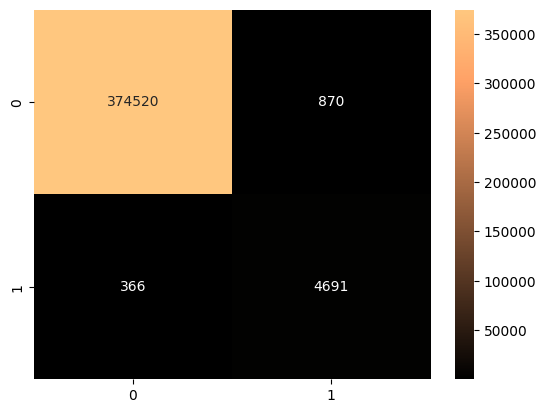

In [61]:
results = {}
results['ad'] = {}

pre_train = clf.predict(X_train)
pre_test = clf.predict(X_valid)

results['ad']['fbeta_train'] = fbeta_score(y_train, pre_train, beta=2)
results['ad']['recall_train'] = recall_score(y_train, pre_train)
results['ad']['precision_train'] = precision_score(y_train, pre_train)

results['ad']['fbeta_test'] = fbeta_score(y_valid, pre_test, beta=2)
results['ad']['recall_test'] = recall_score(y_valid, pre_test)
results['ad']['precision_test'] = precision_score(y_valid, pre_test)

print("fbeta score_train:", results['ad']['fbeta_train'])
print('recall_score_train:', results['ad']['recall_train'])
print('precision_score_train:', results['ad']['precision_train'])

print('========================================================')
print("fbeta score:", results['ad']['fbeta_test'])
print('recall_score:', results['ad']['recall_test'])
print('precision_score:', results['ad']['precision_test'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_valid, pre_test))

conf_matrix = confusion_matrix(y_valid, pre_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()


### Use trianed model predict assign sample and adjust to required csv format

In [62]:
# ypre 是預測的類別，而 yh 是原始分數或機率
ypre = clf.predict(test.drop(['cano','bacno','txkey'],axis=1)) 
yh = clf.predict(test.drop(['cano','bacno','txkey'],axis=1),raw_score=True) 
# 強制令超過1的值為1
yh = (yh > 2) * 1 

In [63]:
yh

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
ypre

array([0., 0., 0., ..., 0., 0., 1.])

In [65]:
ypre = pd.DataFrame(ypre,index=test.index) 
ypre = pd.concat([ypre,test['txkey']],axis=1) 
# summit key 對應到預測種類
b = submit.merge(ypre)
yh = pd.DataFrame(yh,index=test.index) 
yh = pd.concat([yh,test['txkey']],axis=1) 
# summit key 對應到預測機率
c = submit.merge(yh)

In [66]:
b

,txkey,fraud_ind,0
0,592489,0,0.0
1,592452,0,0.0
2,590212,0,0.0
3,590209,0,0.0
4,592488,0,0.0
...,...,...,...
421660,1187507,0,0.0
421661,1182598,0,0.0
421662,898724,0,0.0
421663,971467,0,0.0


In [67]:
b[0].sum()

7375.0

In [68]:
c

,txkey,fraud_ind,0
0,592489,0,0
1,592452,0,0
2,590212,0,0
3,590209,0,0
4,592488,0,0
...,...,...,...
421660,1187507,0,0
421661,1182598,0,0
421662,898724,0,0
421663,971467,0,0


In [69]:
c[0].sum()

4915

In [70]:
b = submit.merge(ypre)
b['fraud_ind'] = b[0]
b.drop(0,axis=1,inplace=True)
b.to_csv('test14.csv')
c = submit.merge(yh)
c['fraud_ind'] = c[0]
c.drop(0,axis=1,inplace=True)
c.to_csv('test15.csv')

# 透過變數分類強度給予變數分數
imp = clf.feature_importances_
imp_col = X_train.columns.tolist()
importance = pd.DataFrame(imp,index=imp_col)
importance.sort_values(0,ascending=False)

,0
frequency_cano,2441
loctm_str,2138
seconds,2117
total_seconds,2013
std_amount,1952
...,...
mean_amount,0
month,0
is_taiwan,0
acc_trad_ave,0


In [71]:
importance.sort_values(0,ascending=False).to_csv("feature importance.csv")